## CNN

### 32x3, 30,1000

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(32, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())
textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           7000      
                                                                 
 conv1d (Conv1D)             (None, 48, 32)            9632      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 250)               8250      
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                        

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,
                     epochs=30,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=1000)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

Epoch 1/30
2342/2342 [==============================] - 29s 7ms/step - loss: 0.1075 - accuracy: 0.9637 - val_loss: 0.0834 - val_accuracy: 0.9706
Epoch 2/30
2342/2342 [==============================] - 16s 7ms/step - loss: 0.0793 - accuracy: 0.9734 - val_loss: 0.0764 - val_accuracy: 0.9731
Epoch 3/30
2342/2342 [==============================] - 16s 7ms/step - loss: 0.0744 - accuracy: 0.9751 - val_loss: 0.0776 - val_accuracy: 0.9727
Epoch 4/30
2342/2342 [==============================] - 16s 7ms/step - loss: 0.0715 - accuracy: 0.9761 - val_loss: 0.0740 - val_accuracy: 0.9740
Epoch 5/30
2342/2342 [==============================] - 16s 7ms/step - loss: 0.0694 - accuracy: 0.9768 - val_loss: 0.0753 - val_accuracy: 0.9739
Epoch 6/30
2342/2342 [==============================] - 16s 7ms/step - loss: 0.0678 - accuracy: 0.9773 - val_loss: 0.0804 - val_accuracy: 0.9722
Epoch 7/30
2342/2342 [==============================] - 17s 7ms/step - loss: 0.0665 - accuracy: 0.9777 - val_loss: 0.0681 - val_ac

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9808
Testing Accuracy:  0.9794


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 23.954699277877808 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    292751
           1       0.95      0.99      0.97    122577

    accuracy                           0.98    415328
   macro avg       0.97      0.98      0.98    415328
weighted avg       0.98      0.98      0.98    415328



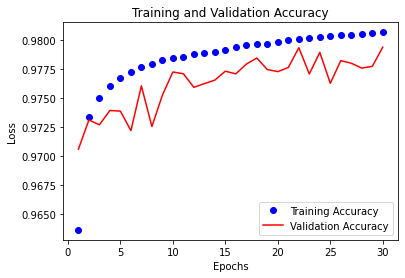

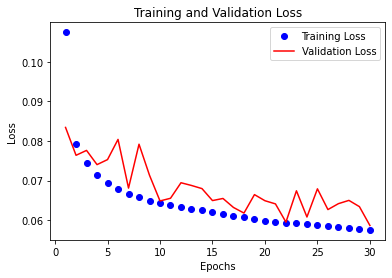

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
max_len = 50
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(32, 3, activation='relu'))
textcnnmodel.add(layers.Conv1D(32, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())
textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 100)           7000      
                                                                 
 conv1d_7 (Conv1D)           (None, 48, 32)            9632      
                                                                 
 conv1d_8 (Conv1D)           (None, 46, 32)            3104      
                                                                 
 global_max_pooling1d_5 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 250)               8250      
                                                      

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,
                     epochs=30,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=1000)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

Epoch 1/30
2341/2341 [==============================] - 33s 8ms/step - loss: 0.1020 - accuracy: 0.9650 - val_loss: 0.0852 - val_accuracy: 0.9704
Epoch 2/30
2341/2341 [==============================] - 19s 8ms/step - loss: 0.0734 - accuracy: 0.9755 - val_loss: 0.0744 - val_accuracy: 0.9743
Epoch 3/30
2341/2341 [==============================] - 19s 8ms/step - loss: 0.0675 - accuracy: 0.9775 - val_loss: 0.0681 - val_accuracy: 0.9761
Epoch 4/30
2341/2341 [==============================] - 19s 8ms/step - loss: 0.0638 - accuracy: 0.9787 - val_loss: 0.0610 - val_accuracy: 0.9785
Epoch 5/30
2341/2341 [==============================] - 19s 8ms/step - loss: 0.0614 - accuracy: 0.9795 - val_loss: 0.0804 - val_accuracy: 0.9727
Epoch 6/30
2341/2341 [==============================] - 19s 8ms/step - loss: 0.0590 - accuracy: 0.9802 - val_loss: 0.0594 - val_accuracy: 0.9793
Epoch 7/30
2341/2341 [==============================] - 20s 8ms/step - loss: 0.0573 - accuracy: 0.9808 - val_loss: 0.0621 - val_ac

In [ ]:
start = time.time()
results = textcnnmodel.evaluate(X_test, y_test)
print ("Accuracy on test set:" , results)
print('Test loss:', results[0])
print('Test accuracy:', results[1])
end  = time.time()
print("CNN took {} milliseconds to test data.\n".format(end-start))

12979/12979 [==============================] - 46s 3ms/step - loss: 0.0511 - accuracy: 0.9823
Accuracy on test set: [0.05113103613257408, 0.9823489189147949]
Test loss: 0.05113103613257408
Test accuracy: 0.9823489189147949
CNN took 82.11718440055847 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_cnnpred = textcnnmodel.predict(X_test)
y_cnnpred=(y_cnnpred > 0.5)
print(classification_report(y_test, y_cnnpred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    293300
           1       0.95      0.99      0.97    122028

    accuracy                           0.98    415328
   macro avg       0.97      0.98      0.98    415328
weighted avg       0.98      0.98      0.98    415328



(array([281133.,   2806.,   1795.,   1290.,   1149.,   1181.,   1319.,
          1833.,   3518., 119304.]),
 array([1.4413043e-35, 1.0000000e-01, 2.0000000e-01, 3.0000001e-01,
        4.0000001e-01, 5.0000000e-01, 6.0000002e-01, 6.9999999e-01,
        8.0000001e-01, 8.9999998e-01, 1.0000000e+00], dtype=float32),
 <a list of 10 Patch objects>)

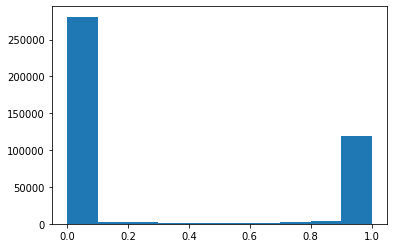

In [ ]:
plt.hist(textcnnmodel.predict(X_test))

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

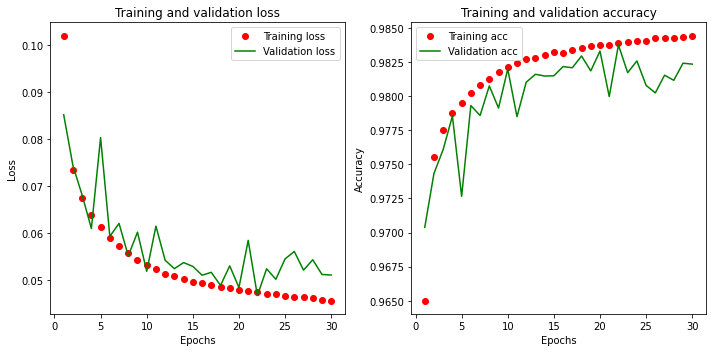

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.rcParams['figure.figsize'] = [10, 5]
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs,val_loss , 'b', label='Validation loss', color='green')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo', label='Training acc', color='red')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc', color='green')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/Bcnnmodel2x32x3.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://42d8c157-00fc-4b03-94f8-b177bd5e9740/assets


### 32x3, 20,128

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(32, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())
textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           7000      
                                                                 
 conv1d_2 (Conv1D)           (None, 48, 32)            9632      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 flatten_2 (Flatten)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 250)               8250      
                                                                 
 dense_5 (Dense)             (None, 1)                 251       
                                                      

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,
                     epochs=20,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=128)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

Epoch 1/20
18295/18295 [==============================] - 91s 5ms/step - loss: 0.0905 - accuracy: 0.9694 - val_loss: 0.0761 - val_accuracy: 0.9734
Epoch 2/20
18295/18295 [==============================] - 89s 5ms/step - loss: 0.0730 - accuracy: 0.9756 - val_loss: 0.0815 - val_accuracy: 0.9718
Epoch 3/20
18295/18295 [==============================] - 86s 5ms/step - loss: 0.0693 - accuracy: 0.9769 - val_loss: 0.0672 - val_accuracy: 0.9766
Epoch 4/20
18295/18295 [==============================] - 90s 5ms/step - loss: 0.0673 - accuracy: 0.9776 - val_loss: 0.0673 - val_accuracy: 0.9767
Epoch 5/20
18295/18295 [==============================] - 85s 5ms/step - loss: 0.0659 - accuracy: 0.9781 - val_loss: 0.0661 - val_accuracy: 0.9773
Epoch 6/20
18295/18295 [==============================] - 90s 5ms/step - loss: 0.0649 - accuracy: 0.9784 - val_loss: 0.0723 - val_accuracy: 0.9753
Epoch 7/20
18295/18295 [==============================] - 84s 5ms/step - loss: 0.0640 - accuracy: 0.9788 - val_loss: 0

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9807
Testing Accuracy:  0.9769


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 16.43698787689209 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    292751
           1       0.93      0.99      0.96    122577

    accuracy                           0.98    415328
   macro avg       0.97      0.98      0.97    415328
weighted avg       0.98      0.98      0.98    415328



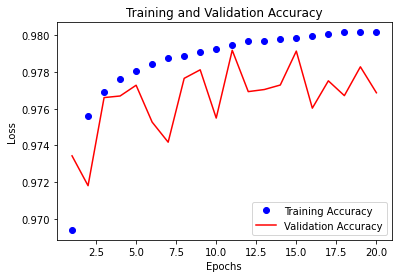

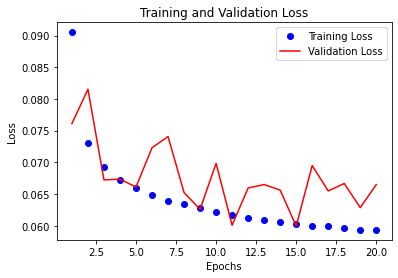

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

### 64x3, 30,1000

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(64, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())
textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           7000      
                                                                 
 conv1d (Conv1D)             (None, 48, 64)            19264     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 250)               16250     
                                                                 
 dense_1 (Dense)             (None, 1)                 251       
                                                        

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,
                     epochs=30,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=1000)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

Epoch 1/30
2342/2342 [==============================] - 36s 10ms/step - loss: 0.0969 - accuracy: 0.9672 - val_loss: 0.0789 - val_accuracy: 0.9726
Epoch 2/30
2342/2342 [==============================] - 20s 9ms/step - loss: 0.0711 - accuracy: 0.9765 - val_loss: 0.0754 - val_accuracy: 0.9742
Epoch 3/30
2342/2342 [==============================] - 19s 8ms/step - loss: 0.0656 - accuracy: 0.9783 - val_loss: 0.0625 - val_accuracy: 0.9783
Epoch 4/30
2342/2342 [==============================] - 21s 9ms/step - loss: 0.0619 - accuracy: 0.9795 - val_loss: 0.0670 - val_accuracy: 0.9768
Epoch 5/30
2342/2342 [==============================] - 21s 9ms/step - loss: 0.0594 - accuracy: 0.9803 - val_loss: 0.0641 - val_accuracy: 0.9779
Epoch 6/30
2342/2342 [==============================] - 20s 8ms/step - loss: 0.0578 - accuracy: 0.9807 - val_loss: 0.0604 - val_accuracy: 0.9789
Epoch 7/30
2342/2342 [==============================] - 20s 8ms/step - loss: 0.0565 - accuracy: 0.9810 - val_loss: 0.0594 - val_a

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9851
Testing Accuracy:  0.9812


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 20.564823627471924 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    292751
           1       0.95      0.99      0.97    122577

    accuracy                           0.98    415328
   macro avg       0.97      0.98      0.98    415328
weighted avg       0.98      0.98      0.98    415328



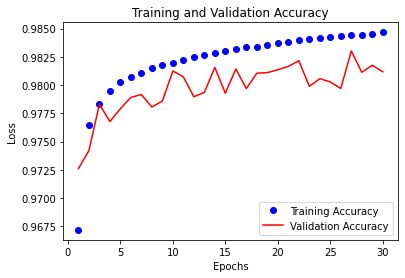

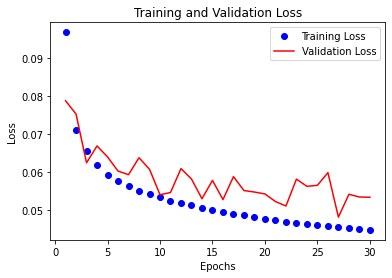

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/Blstmmodel_ftn64x3.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://30f27df9-9c48-4b1b-aaaf-4acf7d1cb624/assets


### 128x3, 1000,30

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(128, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())
textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           7000      
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 128)           38528     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               32250     
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                      

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,
                     epochs=30,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=1000)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

Epoch 1/30
2342/2342 [==============================] - 25s 11ms/step - loss: 0.0896 - accuracy: 0.9698 - val_loss: 0.0632 - val_accuracy: 0.9777
Epoch 2/30
2342/2342 [==============================] - 25s 11ms/step - loss: 0.0644 - accuracy: 0.9787 - val_loss: 0.0692 - val_accuracy: 0.9765
Epoch 3/30
2342/2342 [==============================] - 26s 11ms/step - loss: 0.0595 - accuracy: 0.9803 - val_loss: 0.0536 - val_accuracy: 0.9814
Epoch 4/30
2342/2342 [==============================] - 24s 10ms/step - loss: 0.0559 - accuracy: 0.9814 - val_loss: 0.0537 - val_accuracy: 0.9811
Epoch 5/30
2342/2342 [==============================] - 25s 11ms/step - loss: 0.0532 - accuracy: 0.9823 - val_loss: 0.0606 - val_accuracy: 0.9792
Epoch 6/30
2342/2342 [==============================] - 25s 11ms/step - loss: 0.0511 - accuracy: 0.9829 - val_loss: 0.0525 - val_accuracy: 0.9816
Epoch 7/30
2342/2342 [==============================] - 24s 10ms/step - loss: 0.0495 - accuracy: 0.9834 - val_loss: 0.0562 -

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9882
Testing Accuracy:  0.9842


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 16.6719651222229 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    292751
           1       0.96      0.99      0.97    122577

    accuracy                           0.98    415328
   macro avg       0.98      0.99      0.98    415328
weighted avg       0.98      0.98      0.98    415328



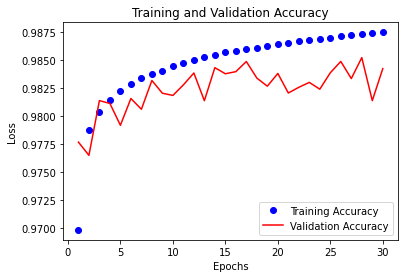

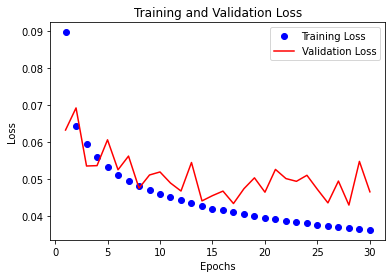

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/Blstmmodel_ftn128x3.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://16669202-9286-4c2b-881b-3539b84db00c/assets


### 512x3

In [ ]:
from keras.models import Sequential
from keras import layers 

embedding_dim = 100
vocab_size=70
textcnnmodel = Sequential()
textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=max_len))
textcnnmodel.add(layers.Conv1D(512, 3, activation='relu'))
textcnnmodel.add(layers.GlobalMaxPooling1D())
textcnnmodel.add(layers.Flatten())
textcnnmodel.add(layers.Dense(250, activation='relu'))
textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           7000      
                                                                 
 conv1d_2 (Conv1D)           (None, 48, 512)           154112    
                                                                 
 global_max_pooling1d_2 (Glo  (None, 512)              0         
 balMaxPooling1D)                                                
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 250)               128250    
                                                                 
 dense_5 (Dense)             (None, 1)                 251       
                                                      

In [ ]:
import time
start = time.time()
history=textcnnmodel.fit(X_train,y_train,
                     epochs=30,
                     verbose=True,
                     validation_data=(X_test, y_test),
                     batch_size=1000)
end  = time.time()
print("LSTM took {} milliseconds to train data.\n".format(end-start))

Epoch 1/30
2342/2342 [==============================] - 70s 29ms/step - loss: 0.0804 - accuracy: 0.9731 - val_loss: 0.0608 - val_accuracy: 0.9786
Epoch 2/30
2342/2342 [==============================] - 69s 29ms/step - loss: 0.0574 - accuracy: 0.9810 - val_loss: 0.0535 - val_accuracy: 0.9813
Epoch 3/30
2342/2342 [==============================] - 67s 29ms/step - loss: 0.0511 - accuracy: 0.9828 - val_loss: 0.0566 - val_accuracy: 0.9806
Epoch 4/30
2342/2342 [==============================] - 68s 29ms/step - loss: 0.0464 - accuracy: 0.9843 - val_loss: 0.0457 - val_accuracy: 0.9836
Epoch 5/30
2342/2342 [==============================] - 69s 29ms/step - loss: 0.0432 - accuracy: 0.9852 - val_loss: 0.0489 - val_accuracy: 0.9828
Epoch 6/30
2342/2342 [==============================] - 69s 29ms/step - loss: 0.0409 - accuracy: 0.9860 - val_loss: 0.0417 - val_accuracy: 0.9849
Epoch 7/30
2342/2342 [==============================] - 67s 29ms/step - loss: 0.0392 - accuracy: 0.9866 - val_loss: 0.0512 -

In [ ]:
loss, accuracy = textcnnmodel.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = textcnnmodel.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Training Accuracy: 0.9934
Testing Accuracy:  0.9849


In [ ]:
start = time.time()
y_lstmpred = textcnnmodel.predict(X_test)
end  = time.time()
print("LSTM took {} milliseconds to test data.\n".format(end-start))

LSTM took 18.004701852798462 milliseconds to test data.



In [ ]:
from sklearn.metrics import classification_report
y_lstmpred=(y_lstmpred > 0.5)
print(classification_report(y_test, y_lstmpred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    292751
           1       0.96      0.99      0.97    122577

    accuracy                           0.98    415328
   macro avg       0.98      0.99      0.98    415328
weighted avg       0.99      0.98      0.98    415328



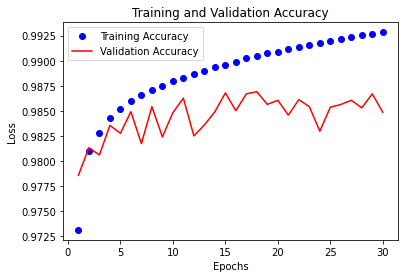

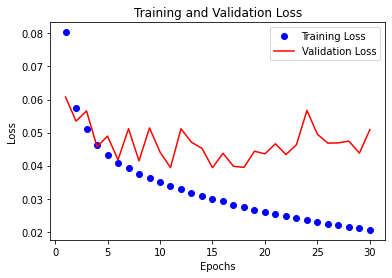

In [ ]:
def Training_and_validation_plot(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
Training_and_validation_plot(history)

In [ ]:
import pickle
# save the model to disk
filename = '/content/drive/My Drive/Colab Notebooks/Blstmmodel_ftn512x3.sav'
pickle.dump(textcnnmodel, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://3ab8fecb-3cb6-43c5-98c1-bbde96808504/assets
